# Research Question 3 -  How do champions differ from the rest?

Each of the 12 UFC weight classes has a champion. Every fighter on the roster aspires to be in that position. For this research question we will analyse what makes the best the best. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import html5lib

import requests 
from bs4 import BeautifulSoup
import urllib
import time

Read in the main dataframe

In [2]:
main = pd.read_csv("final.csv")

## Strike Accuracy of Champions

A strike is a punch, kick, elbow or knee. This graph will highlight champions striking output compared to every other fighter. A new dataframe was created called scatter_st1. A variable 'is_champ' was created and set to True for all champs (Rank = 0)  All duplicates were dropped.

In [3]:
scatter_st1 = main[["Name","Weight Class", "st_attemp","st_land",'Rank','Total UFC Fights','UFC Wins','UFC Losses','ex_champ']]

scatter_st1['is_champ'] = scatter_st1['Rank']==0

scatter_st1.drop_duplicates(subset ="Name", keep = "first", inplace = True)
scatter_st1.head(5)

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Name,Weight Class,st_attemp,st_land,Rank,Total UFC Fights,UFC Wins,UFC Losses,ex_champ,is_champ
0,Andrei Arlovski,Heavyweight,1790.0,749.0,15.0,28,16,12,True,False
2,Alistair Overeem,Heavyweight,605.0,442.0,7.0,17,11,6,False,False
3,Cain Velasquez,Heavyweight,1249.0,719.0,8.0,15,12,3,True,False
5,Fabricio Werdum,Heavyweight,1491.0,833.0,NaN,17,11,6,False,False
6,Todd Duffee,Heavyweight,258.0,92.0,NaN,5,3,2,False,False


Strikes attempted and strikes landed where divided by no. of UFC fights to get strikes per fight. 

In [4]:
scatter_st1['st_attemp'] = scatter_st1['st_attemp']/scatter_st1['Total UFC Fights']
scatter_st1['st_land'] = scatter_st1['st_land']/scatter_st1['Total UFC Fights']

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


A scatter plot was then created. Two seperate groups are plotted on the scatter graph. The larger gold dots are the champions and the smaller black dots are everyone else.

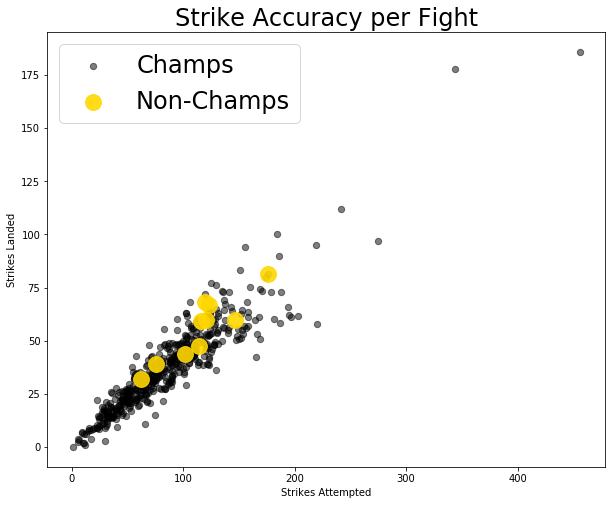

In [5]:
fig, ax = plt.subplots(figsize=(10, 8))

champs = scatter_st1[scatter_st1['is_champ']] # champs datframe is a subset of scatter_st1, where 'is_champ' is True
not_champs = scatter_st1[~scatter_st1['is_champ']] # similarly not_champs is a subset where 'is_champ' is False

not_champs.plot.scatter(x = "st_attemp", y ="st_land", c='black', ax=ax, s=40, alpha=.5, label = 'Champs')
champs.plot.scatter(x = "st_attemp", y ="st_land", c='gold', ax=ax, s=250, alpha=.9, label = 'Non-Champs')



plt.xlabel("Strikes Attempted")
plt.ylabel("Strikes Landed")

plt.rcParams.update({'font.size': 24})
plt.title("Strike Accuracy per Fight", fontsize=24)
ax.legend()

The champions seem to both attempt and land more than the average fighter telling us that striking is very important and you can't be successful in the UFC without it.

# Strike Accuracy for Past and Present Champions

The same graph was plotted again except with ex-champions now in red. These are active UFC fighters who used to hold the belt.

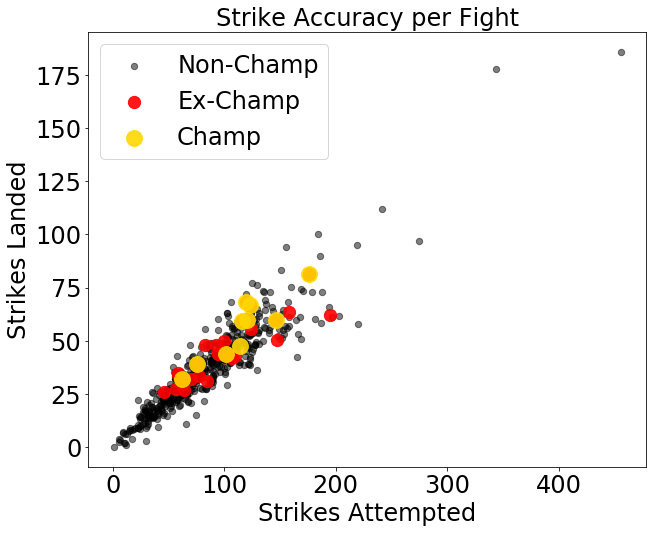

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))

ex_champs = scatter_st1[scatter_st1['ex_champ'] == True]
not_champs = scatter_st1[scatter_st1['ex_champ'] == False]
is_champs = scatter_st1[scatter_st1['Rank'] == 0]

not_champs.plot.scatter(x = "st_attemp", y ="st_land", c='black', ax=ax, s=40, alpha=.5, label =  'Non-Champ')
ex_champs.plot.scatter(x = "st_attemp", y ="st_land", c='red', ax=ax, s=150, alpha=.9, label = 'Ex-Champ')
is_champs.plot.scatter(x = "st_attemp", y ="st_land", c='gold', ax=ax, s=250, alpha=.9, label = 'Champ')

plt.xlabel("Strikes Attempted")
plt.ylabel("Strikes Landed")
plt.title("Strike Accuracy per Fight", fontsize=24)
ax.legend()

This chart reinforces the fact that striking is an essential skill in the UFC. Every champion and former champion has at very least, a decent level of striking output. 

## Takedown Accuracy of Champions

Takedowns are when a fighter wrestles another fighter to the ground. They are a key part of grappling in MMA. Once again, a new dataframe is created. A variable, 'is_champ' is set to true for those of rank 0 (champions). Duplicates are then dropped.

In [7]:
scatter_st2 = main[["Name","Weight Class", "tk_attemp","tk_land",'Rank','Total UFC Fights','ex_champ']]
scatter_st2['is_champ'] = scatter_st2['Rank']==0

scatter_st2.loc[scatter_st2['is_champ'] == True]

scatter_st2.drop_duplicates(subset ="Name",  keep = 'first', inplace = True)

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Takedeons attempted and landed are divided by total number of fights to get both per fight. A graph was then plotted with champions represented by big gold dots and everyone else represented by smaller, black ones.

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Takedown Accuracy per Fight')

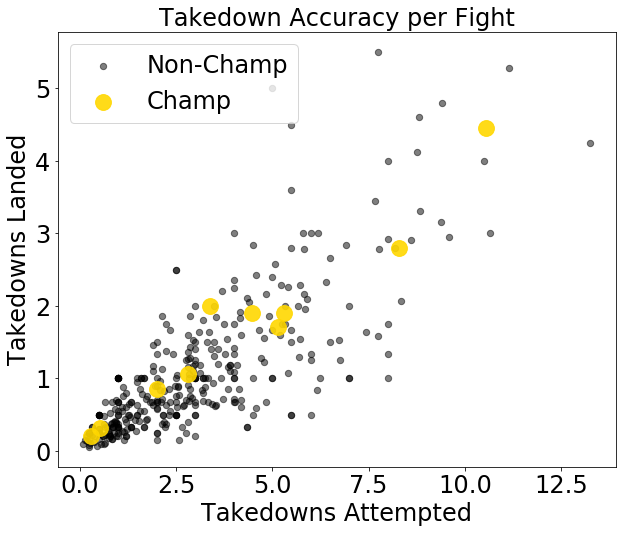

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

scatter_st2['tk_attemp_per_fight'] = scatter_st2['tk_attemp']/scatter_st2['Total UFC Fights']
scatter_st2['tk_land_per_fight'] = scatter_st2['tk_land']/scatter_st2['Total UFC Fights']


champs = scatter_st2[scatter_st2['is_champ']]
not_champs = scatter_st2[~scatter_st2['is_champ']]

not_champs.plot.scatter(x = "tk_attemp_per_fight", y ="tk_land_per_fight", c='black', ax=ax, s=40, alpha=.5, label = 'Non-Champ')
champs.plot.scatter(x = "tk_attemp_per_fight", y ="tk_land_per_fight", c='gold', ax=ax, s=250, alpha=.9, label = 'Champ')

plt.xlabel("Takedowns Attempted")
plt.ylabel("Takedowns Landed")

plt.title("Takedown Accuracy per Fight", fontsize=24)

Takedowns aren't as key as strikes in the UFC as two champions never use them and two more use them very rarely. However they can be used to great effect as highlighted by the two gold dots further up the graph, and the group of three in the middle.

## Takedown Accuracy for Past and Present Champions

Once again the same graph was plotted again, this time with ex champs in red.

Text(0.5, 1.0, 'Takedown Accuracy per Fight')

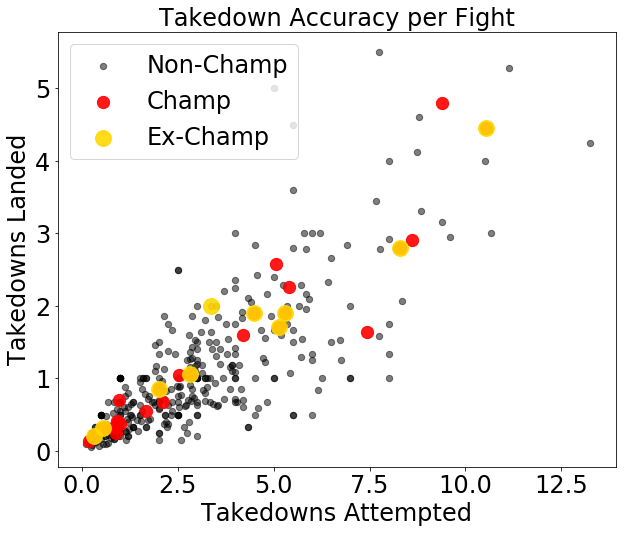

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

ex_champs = scatter_st2[scatter_st2['ex_champ'] == True]
not_champs = scatter_st2[scatter_st2['ex_champ'] == False]
is_champs = scatter_st2[scatter_st2['Rank'] == 0]

not_champs.plot.scatter(x = "tk_attemp_per_fight", y ="tk_land_per_fight", c='black', ax=ax, s=40, alpha=.5,label = 'Non-Champ')
ex_champs.plot.scatter(x = "tk_attemp_per_fight", y ="tk_land_per_fight", c='red', ax=ax, s=150, alpha=.9, label = 'Champ')
is_champs.plot.scatter(x = "tk_attemp_per_fight", y ="tk_land_per_fight", c='gold', ax=ax, s=250, alpha=.9, label = 'Ex-Champ')

plt.xlabel("Takedowns Attempted")
plt.ylabel("Takedowns Landed")

plt.title("Takedown Accuracy per Fight", fontsize=24)


This also reinforces the point the previous graph made. Many champions hover around zero takdowns per fight. However, numerous ex champions are in and around the best wrestlers in the UFC. I think this shows that champions don't need to have a high level of wrestling, but if they do, it can be very dangerous.

## Significant Strike by Target

Significant Strike by Target was the next data analysed. This is which body part a fighter attacks with their strikes, head, body or legs. A subset calles champ_strk_per is declared. Three new columns are created - 'hd_strk_p' , 'bd_strk_p' and 'lg_strk_p'. These columns are then filled by dividing head,body and leg strikes by total strikes.

In [10]:
champ_strk_per = main[["Name",'hd_strk','bd_strk','lg_stk',"Rank"]]
champ_strk_per['hd_strk_p'] = champ_strk_per['hd_strk']/(champ_strk_per['hd_strk'] + champ_strk_per['bd_strk'] + champ_strk_per['lg_stk'])
champ_strk_per['bd_strk_p'] = champ_strk_per['bd_strk']/(champ_strk_per['hd_strk'] + champ_strk_per['bd_strk'] + champ_strk_per['lg_stk'])
champ_strk_per['lg_strk_p'] = champ_strk_per['lg_stk']/(champ_strk_per['hd_strk'] + champ_strk_per['bd_strk'] + champ_strk_per['lg_stk'])



C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


A new dataframe is created by copying the previous one. This will be used later.

In [11]:
not_champ_strk_per = champ_strk_per

Any non champs in 'champ_strk_per' are then dropped as well as any columns not useful in graphs

In [12]:
champ_strk_per = champ_strk_per.loc[champ_strk_per['Rank'] == 0]
champ_strk_per = champ_strk_per.drop(['hd_strk','bd_strk','lg_stk','Rank'], axis=1)
champ_strk_per = champ_strk_per.drop_duplicates(keep='first')

champ_strk_per

,Name,hd_strk_p,bd_strk_p,lg_strk_p
8,Daniel Cormier,0.720000,0.158400,0.121600
42,Jon Jones,0.496154,0.240769,0.263077
100,Robert Whittaker,0.700258,0.130491,0.169251
179,Kamaru Usman,0.610778,0.284431,0.104790
229,Khabib Nurmagomedov,0.867580,0.083714,0.048706
305,Max Holloway,0.733866,0.207744,0.058390
427,Henry Cejudo,0.543182,0.372727,0.084091
436,Amanda Nunes,0.606715,0.148681,0.244604
478,Valentina Shevchenko,0.622596,0.129808,0.247596
512,Rose Namajunas,0.763780,0.167979,0.068241


In [13]:
champ_strk_per['Name'] = champ_strk_per['Name'].map(lambda x: x.split(' ')[1].strip())
champ_strk_per = champ_strk_per.set_index('Name')
champ_strk_per

,hd_strk_p,bd_strk_p,lg_strk_p
Name,,,
Cormier,0.720000,0.158400,0.121600
Jones,0.496154,0.240769,0.263077
Whittaker,0.700258,0.130491,0.169251
Usman,0.610778,0.284431,0.104790
Nurmagomedov,0.867580,0.083714,0.048706
Holloway,0.733866,0.207744,0.058390
Cejudo,0.543182,0.372727,0.084091
Nunes,0.606715,0.148681,0.244604
Shevchenko,0.622596,0.129808,0.247596


A barchart was then created with the 10 champs (Amanda Nunes is the champion of two divisions and bantamweight is currently vacant). This barchart highlights where a fighters strikes land. So if a fighters Head Strike % is 0.6, 60 percent of a fighters strikes hit the oppponents head. The different lines are the average for the __entire ufc__. The red line is average head strike % for all ufc fighters etc


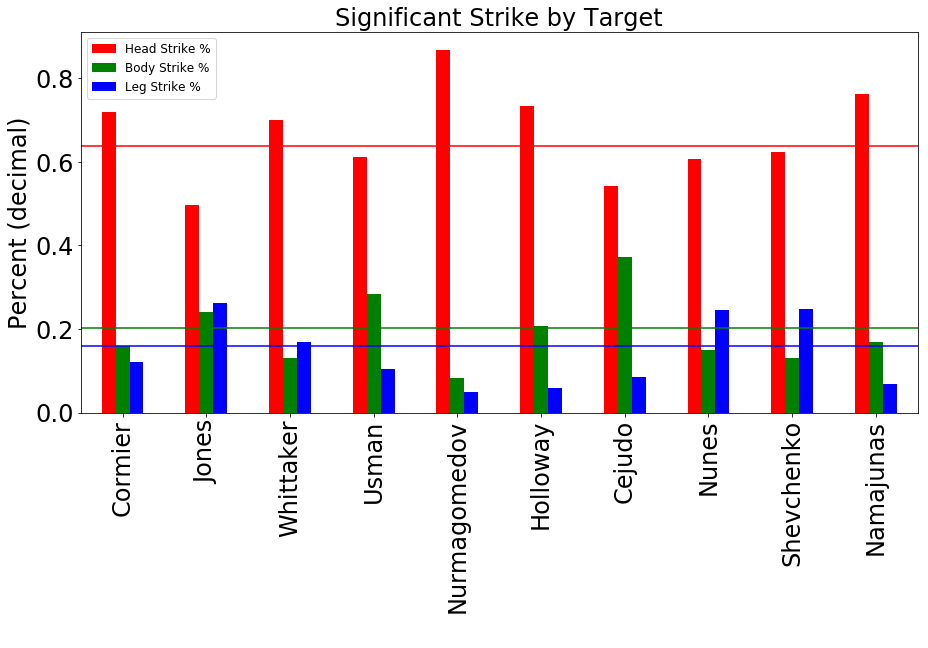

In [14]:
fig,ax= plt.subplots()
champ_strk_per.plot(kind="bar", ax=ax, color=['r', 'g', 'b'],figsize=(15,7))

hd_mean = not_champ_strk_per["hd_strk_p"].mean() # this is the duplicate dataframe created earlier
ax.axhline(hd_mean, color = 'r')

bd_mean = not_champ_strk_per["bd_strk_p"].mean()
ax.axhline(bd_mean, color = 'g')

lg_mean = not_champ_strk_per["lg_strk_p"].mean()
ax.axhline(lg_mean, color = 'b')

plt.ylabel("Percent (decimal)")
plt.title("Significant Strike by Target", fontsize=24)
plt.xlabel(" ")
plt.ylabel("Percent (decimal)")

L=plt.legend(loc = 'upper left', prop={'size': 12})
L.get_texts()[0].set_text('Head Strike %')
L.get_texts()[1].set_text('Body Strike %')
L.get_texts()[2].set_text('Leg Strike %')

A lot of the champions have lower leg strike percentages than the average, with high body and head strike percentages. Maybe fighters place too much of an emphasis on leg kicks. Five out of the ten are above average on head strikes. Jon Jones varies his strikes the most, with head strikes well below the average, but body and leg strikes above. He is the most accomplished figther on this list so maybe others could learn from him

## Significant Strike by Position

Significant Strike by Position means where the fighter threw the strike from. Standing is fairly obvious, this means facing each other in boxing or kickboxing range. Clinch is a boxing or kickboxing clinch, usually leaning against the fence of the octogan. Ground strikes refers to both fighters on the ground, usually in a jiu jitsu postion such as guard, half guard etc. 

Once again a new dataframe was created. The percentage of each striking position was found by dividing each one by the total. Another duplicate dataframe was created that will be used later or the mean of every UFC fighter. All non champs are, duplicates and irrelevant rows are them dropped.

In [15]:
strk_thrwn = main[["Name",'stand_stk','clinch_stk','grnd_stk',"Rank"]]

strk_thrwn['stand_s_p'] = strk_thrwn['stand_stk']/(strk_thrwn['stand_stk'] + strk_thrwn['clinch_stk'] + strk_thrwn['grnd_stk'])
strk_thrwn['clinch_stk_p'] = strk_thrwn['clinch_stk']/(strk_thrwn['stand_stk'] + strk_thrwn['clinch_stk'] + strk_thrwn['grnd_stk'])
strk_thrwn['grnd_stk_p'] = strk_thrwn['grnd_stk']/(strk_thrwn['stand_stk'] + strk_thrwn['clinch_stk'] + strk_thrwn['grnd_stk'])


not_champ_strk_thrwn = strk_thrwn
strk_thrwn = strk_thrwn.loc[strk_thrwn['Rank'] == 0]


strk_thrwn = strk_thrwn.drop(['Rank','stand_stk','clinch_stk','grnd_stk'], axis=1)
strk_thrwn = strk_thrwn.drop_duplicates(keep='first')

strk_thrwn

C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Lorcan Rooney\Anaconda3\envs\env_name\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,Name,stand_s_p,clinch_stk_p,grnd_stk_p
8,Daniel Cormier,0.499200,0.284800,0.216000
42,Jon Jones,0.613077,0.185385,0.201538
100,Robert Whittaker,0.817829,0.094315,0.087855
179,Kamaru Usman,0.407186,0.218563,0.374251
229,Khabib Nurmagomedov,0.400304,0.039574,0.560122
305,Max Holloway,0.807621,0.102028,0.090350
427,Henry Cejudo,0.602273,0.250000,0.147727
436,Amanda Nunes,0.709832,0.052758,0.237410
478,Valentina Shevchenko,0.608173,0.115385,0.276442
512,Rose Namajunas,0.716535,0.094488,0.188976


First names were droppped to make the graph more legible in the presentation.

In [16]:
strk_thrwn['Name'] = strk_thrwn['Name'].map(lambda x: x.split(' ')[1].strip())
strk_thrwn = strk_thrwn.set_index('Name')
strk_thrwn

,stand_s_p,clinch_stk_p,grnd_stk_p
Name,,,
Cormier,0.499200,0.284800,0.216000
Jones,0.613077,0.185385,0.201538
Whittaker,0.817829,0.094315,0.087855
Usman,0.407186,0.218563,0.374251
Nurmagomedov,0.400304,0.039574,0.560122
Holloway,0.807621,0.102028,0.090350
Cejudo,0.602273,0.250000,0.147727
Nunes,0.709832,0.052758,0.237410
Shevchenko,0.608173,0.115385,0.276442


The graph was then plotted. Each champion is on the x axis with the perfcent as a decimal on the y axis. Once again the red line stands for the average percent of a fighters strikes thrown from a standing positon for the entire UFC.

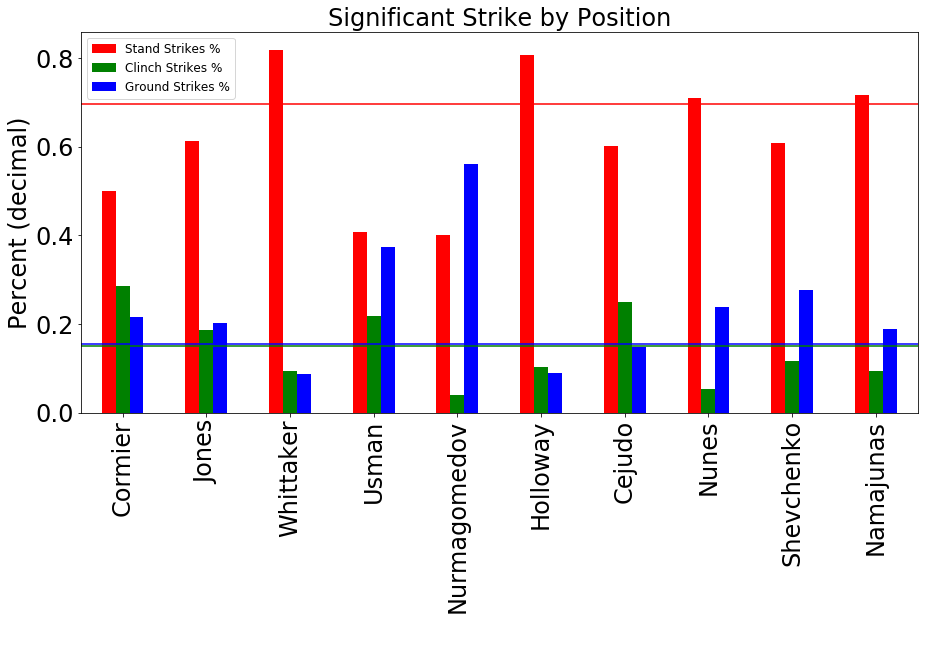

In [17]:
fig,ax= plt.subplots()
strk_thrwn.plot(kind="bar", ax=ax, color=['r', 'g', 'b'],figsize=(15,7))

stand_mean = not_champ_strk_thrwn['stand_s_p'].mean()
ax.axhline(stand_mean, color = 'r')

clinch_mean = not_champ_strk_thrwn['clinch_stk_p'].mean()
ax.axhline(clinch_mean, color = 'g')

grnd_mean = not_champ_strk_thrwn['grnd_stk_p'].mean()
ax.axhline(grnd_mean, color = 'b')

plt.rcParams.update({'font.size': 24})
plt.title("Significant Strike by Position", fontsize=24)
plt.xlabel(" ")
plt.ylabel("Percent (decimal)")

L=plt.legend(loc = 'upper left', prop={'size': 12})

L.get_texts()[0].set_text('Stand Strikes %')
L.get_texts()[1].set_text('Clinch Strikes %')
L.get_texts()[2].set_text('Ground Strikes %')





plt.show()

Many champions have a lot lower standing strikes than the average UFC fighter. I think this graph shows that the champions are more well rounded than the average fighter, with many utilising vastly more clinch and ground strikes compared to your average fighter. Two in Whittaker and Holloway stand out as having a higher percentage of standing strikes than the average fighter. This shows that being a predominantly 'stand up' based fighter at a high level is still possible, but not the norm.